In [546]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## import the library below:

In [547]:
from PyEyeSim import EyeData


In [548]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [549]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [550]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

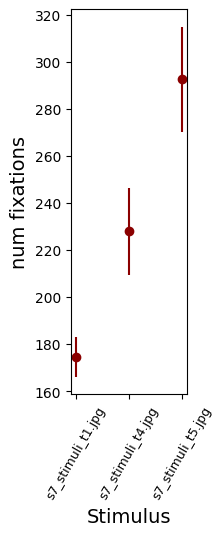

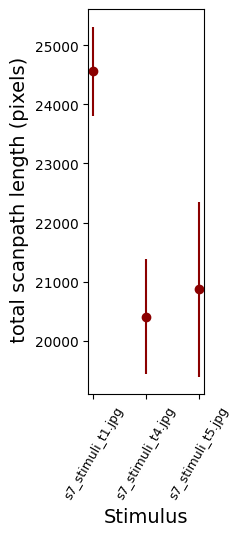

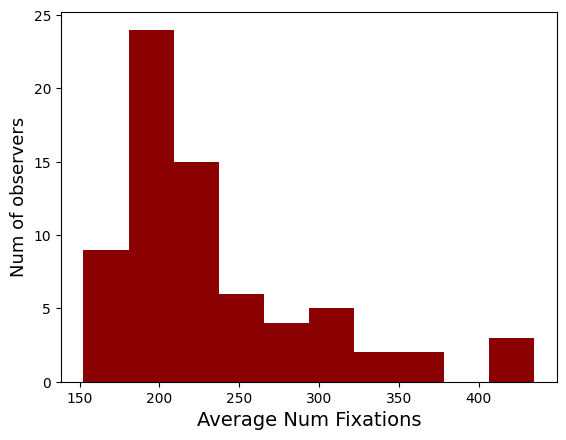

In [551]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='orig_fix_x',mean_y='orig_fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid', StimPath=Path+'images/',StimExt='.jpg')
DyslexiaDat.RunDescriptiveFix(Visual=1)


In [552]:
CondIdx, Cond = DyslexiaDat.GetGroups('class_id')

Conditions [0 1]


In [553]:
Cond

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

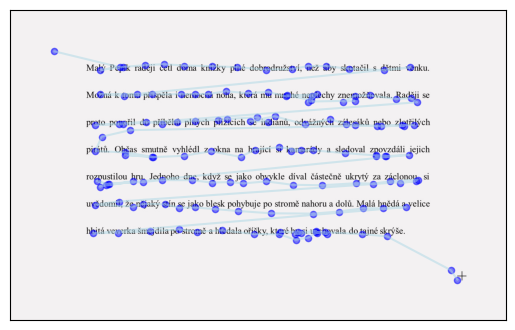

In [554]:
DyslexiaDat.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=0)

Error in callback <function _draw_all_if_interactive at 0x0000014B27DA5300> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

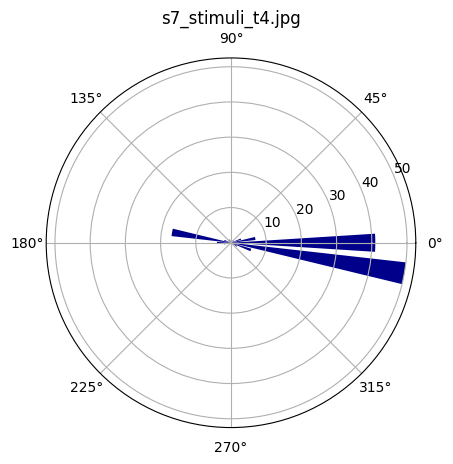

In [555]:
DyslexiaDat.Vis_Saccade_Angles(DyslexiaDat.stimuli[1], 0, 'darkblue', binsize=10)

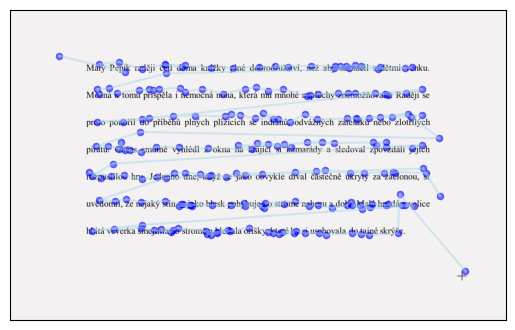

In [58]:
DyslexiaDat.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=4)

In [79]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1,InferS=False)

In [78]:
x = 0
for sac in SaccadeObj[0][0]:
    print(sac.Coords())
    print(sac.Angle())
    x += 1

(161.49, 170.94, 338.18499999999995, 171.865)
0.29994120891851794
(338.18499999999995, 171.865, 450.405, 168.055)
358.05548830618443
(450.405, 168.055, 582.0225, 161.01)
356.9360918231723
(582.0225, 161.01, 467.5750000000001, 168.845)
176.08367946109553
(467.5750000000001, 168.845, 586.045, 159.235)
355.3624588605811
(586.045, 159.235, 691.33, 178.13)
10.174294194192603
(691.33, 178.13, 715.46, 160.465)
323.79302764841356
(715.46, 160.465, 835.3, 179.23250000000002)
8.900493169389064
(835.3, 179.23250000000002, 961.77, 174.495)
357.8547331370706
(961.77, 174.495, 1071.745, 161.245)
353.13000769178575
(1071.745, 161.245, 1184.955, 161.995)
0.3795707622265291
(1184.955, 161.995, 1325.8775, 145.775)
353.4342209969237
(1325.8775, 145.775, 385.405, 241.56)
174.18460656250423
(385.405, 241.56, 341.27, 236.795)
186.16202493774378
(341.27, 236.795, 466.21, 220.705)
352.66173540963234
(466.21, 220.705, 581.565, 222.035)
0.6605696362691952
(581.565, 222.035, 705.615, 222.5)
0.21477156540572595
(

In [27]:
DyslexiaDat.saccadeangles[0,0].size

135

In [17]:
DyslexiaDat.saccadeangles.shape

(70, 3)

In [ ]:
Saccades[4,1][0,0].size

202

<BarContainer object of 36 artists>

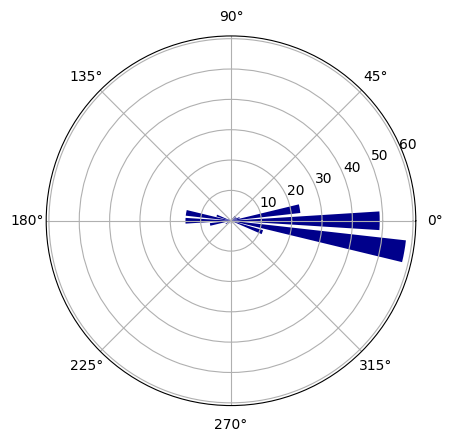

In [ ]:
binss=np.arange(0,360+10,10)
width= np.pi / 25
bincounts, edges=np.histogram(Saccades[4,1][0,0],bins=binss)
ax=plt.subplot(projection='polar')
ax.bar(np.deg2rad(edges[:-1]),bincounts,width=width,bottom=0.0,color='darkblue')

In [235]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=9,InferS=False)

In [ ]:
x = 0
for i in range(0,8):
    for j in range(0,8):
        x += Saccades[0,0][i,j].size
print(x)

292


<BarContainer object of 36 artists>

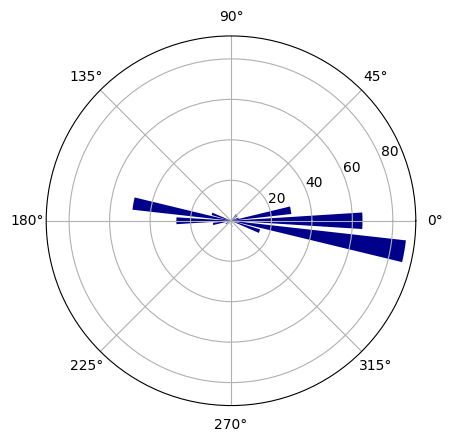

In [75]:
binss=np.arange(0,360+10,10)
width= np.pi / 25
saccade_angles = np.array([])
for i in range(0,8):
    for j in range(0,8):
        saccade_angles = np.append(saccade_angles, Saccades[4,1][i,j])
bincounts, edges=np.histogram(saccade_angles,bins=binss)
ax=plt.subplot(projection='polar')
ax.bar(np.deg2rad(edges[:-1]),bincounts,width=width,bottom=0.0,color='darkblue')

In [15]:
DyslexiaDat.saccadeangles[4,1].size

202

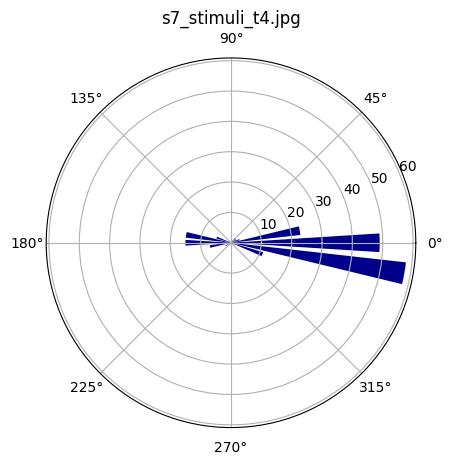

In [ ]:
DyslexiaDat.Vis_Saccade_Angles(DyslexiaDat.stimuli[1], 4, 'darkblue', binsize=10)

In [243]:
Cond

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

In [259]:
from PyEyeSim.scanpathsimhelper import CalcSimAlt, angle_difference_peak180, KuiperStat, angle_difference_power

In [240]:
print(CalcSimAlt(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1], Thr=5))# Non-Dyslexic vs Dyslexic
print(CalcSimAlt(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1], Thr=5))# Non-Dyslexic vs Non-Dyslexic

7058
8456


In [252]:
print(angle_difference_power(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1]))
print(angle_difference_power(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1]))

0.15363203265188063
0.12930800020392533


In [ ]:
print(angle_difference_peak180(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1]))
print(angle_difference_peak180(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1]))

0.4821339474384762
0.4795234990991283


In [238]:
print(angle_difference_peak180(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1], match=True))
print(angle_difference_peak180(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1], match=True))

0.6326358271155005
0.628010982363088


In [ ]:
print(KuiperStat(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1]))
print(KuiperStat(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1]))

0.8285714285714286
0.8755332902391727


In [276]:
s1 = np.array([0,180])
s2 = np.array([0,180])
print(f'First saccade angles: {s1}, Second saccade angles: {s2}')
print('Original Similarity Metric (+1 if angles are lass or equal than threshold):')
print(CalcSimAlt(s1, s2, Thr=5))
print('Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_power(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1, match=True))
print('Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)')
print(KuiperStat(s1, s2))

First saccade angles: [  0 180], Second saccade angles: [  0 180]
Original Similarity Metric (+1 if angles are lass or equal than threshold):
2
Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.0
Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.5
Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):
0.0
Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)
1.0


In [277]:
s1 = np.array([0,90])
s2 = np.array([2,85])
print(f'First saccade angles: {s1}, Second saccade angles: {s2}')
print('Original Similarity Metric (+1 if angles are lass or equal than threshold):')
print(CalcSimAlt(s1, s2, Thr=5))
print('Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_power(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1, match=True))
print('Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)')
print(KuiperStat(s1, s2))

First saccade angles: [ 0 90], Second saccade angles: [ 2 85]
Original Similarity Metric (+1 if angles are lass or equal than threshold):
1
Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.5
Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.25
Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):
0.01944444444444443
Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)
0.0


In [347]:
# generate random data normal distributed with values greater than 0 and less or equal than 360
np.random.seed(0)
s1 = np.abs(np.random.randn(100)) * 360 % 360
np.random.seed(1)
s2 = np.abs(np.random.randn(100)) * 360 % 360

In [348]:
# show size
print(f'Size of s1: {s1.size}')
print(f'Size of s2: {s2.size}')
# Find the intersection
intersection = np.intersect1d(s1, s2)

# Count the number of elements in the intersection
count = len(intersection)

print(f'Number of value inside s1 that are also in s2: {count}')

Size of s1: 100
Size of s2: 100
Number of value inside s1 that are also in s2: 0


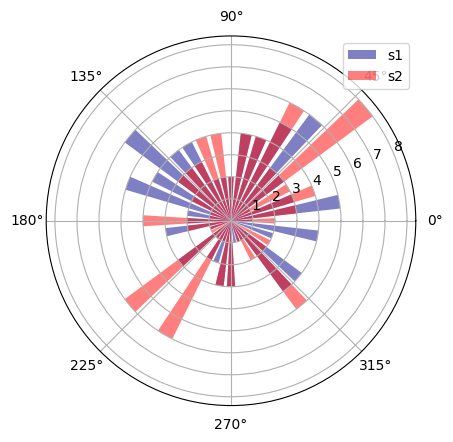

In [349]:
binss = np.arange(0, 360 + 10, 10)
width = np.pi / 25
saccade_angles = np.array([])

# Histogram for s1
bincounts_s1, edges_s1 = np.histogram(s1, bins=binss)
ax = plt.subplot(projection='polar')
ax.bar(np.deg2rad(edges_s1[:-1]), bincounts_s1, width=width, bottom=0.0, color='darkblue', alpha=0.5, label='s1')

# Histogram for s2
bincounts_s2, edges_s2 = np.histogram(s2, bins=binss)
ax.bar(np.deg2rad(edges_s2[:-1]), bincounts_s2, width=width, bottom=0.0, color='red', alpha=0.5, label='s2')

ax.legend()
plt.show()

In [ ]:
print('Original Similarity Metric (+1 if angles are lass or equal than threshold):')
print(CalcSimAlt(s1, s2, Thr=5))
print('Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_power(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1, match=True))
print('Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)')
print(KuiperStat(s1, s2))

Original Similarity Metric (+1 if angles are lass or equal than threshold):
558
Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.5020127312590921
Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.3213748702290373
Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):
0.6503216177800245
Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)
0.7899999999999999


In [278]:
def correctSub2Sub(Matrix):
    """
    Remove all the value equal to -np.inf and retrun the corrected matrix and a list of value that are not removed (position)
    """
    position = set()
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            if Matrix[i,j] != -np.inf:
                position.add(i)

    CorrectMatrix = np.zeros((len(position),len(position)))
    position = list(position)
    for i in range(len(position)):
        for j in range(len(position)):
            CorrectMatrix[i,j] = Matrix[position[i],position[j]]

    return CorrectMatrix, position

In [279]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1,InferS=False)

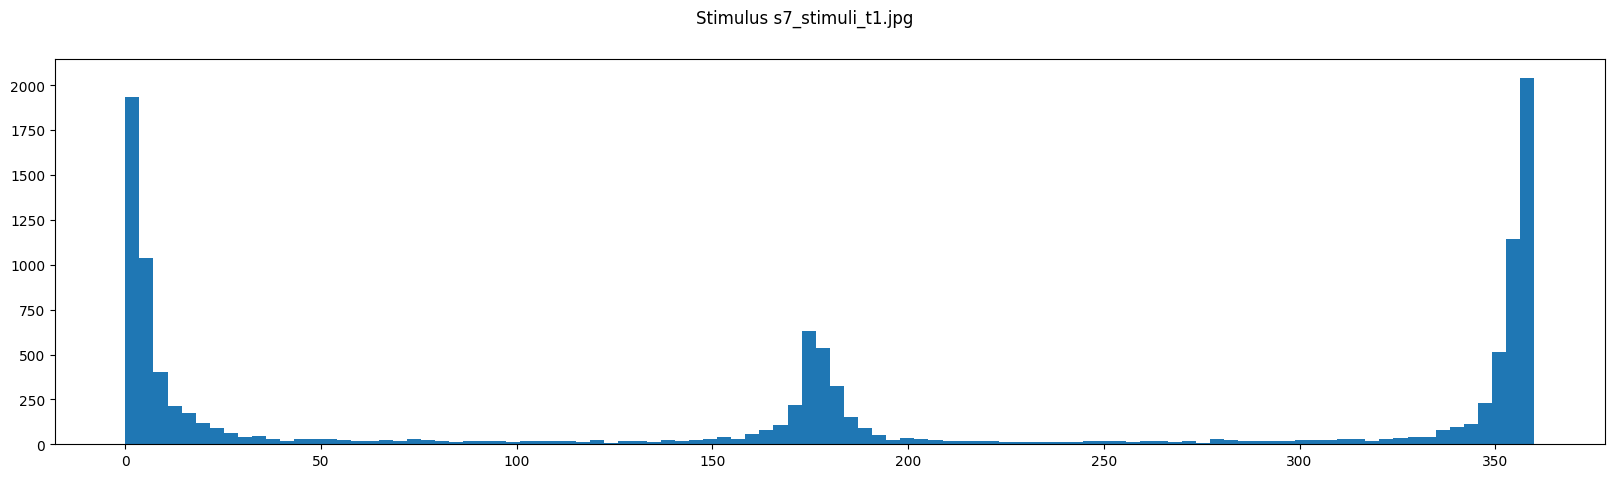

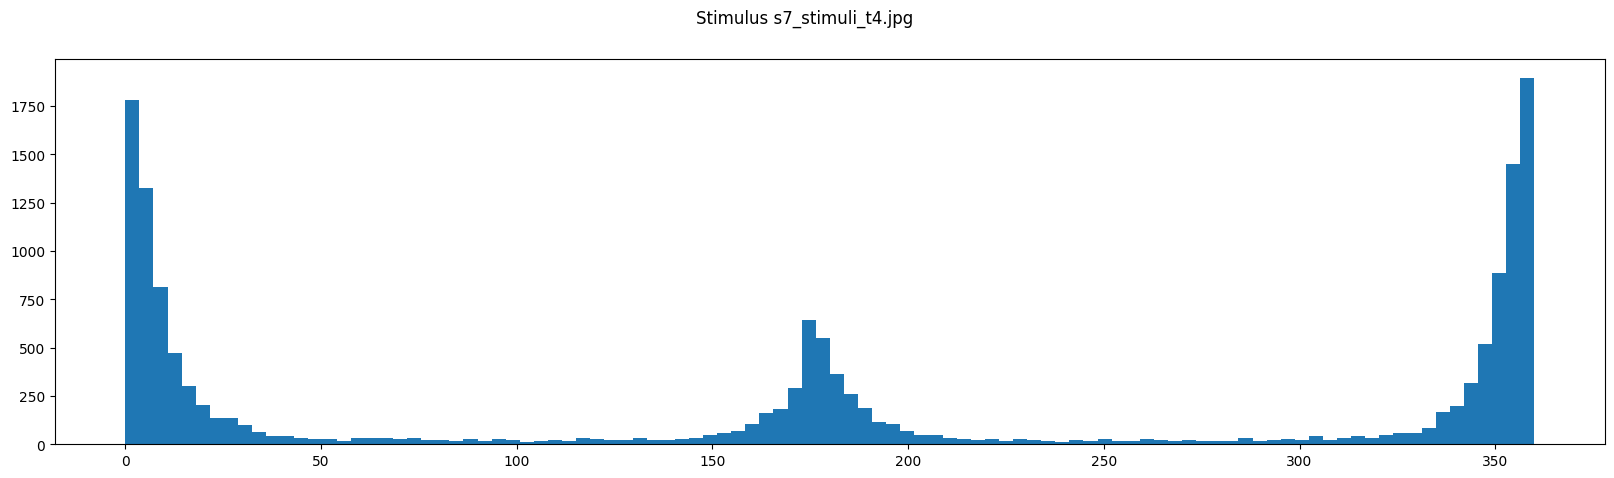

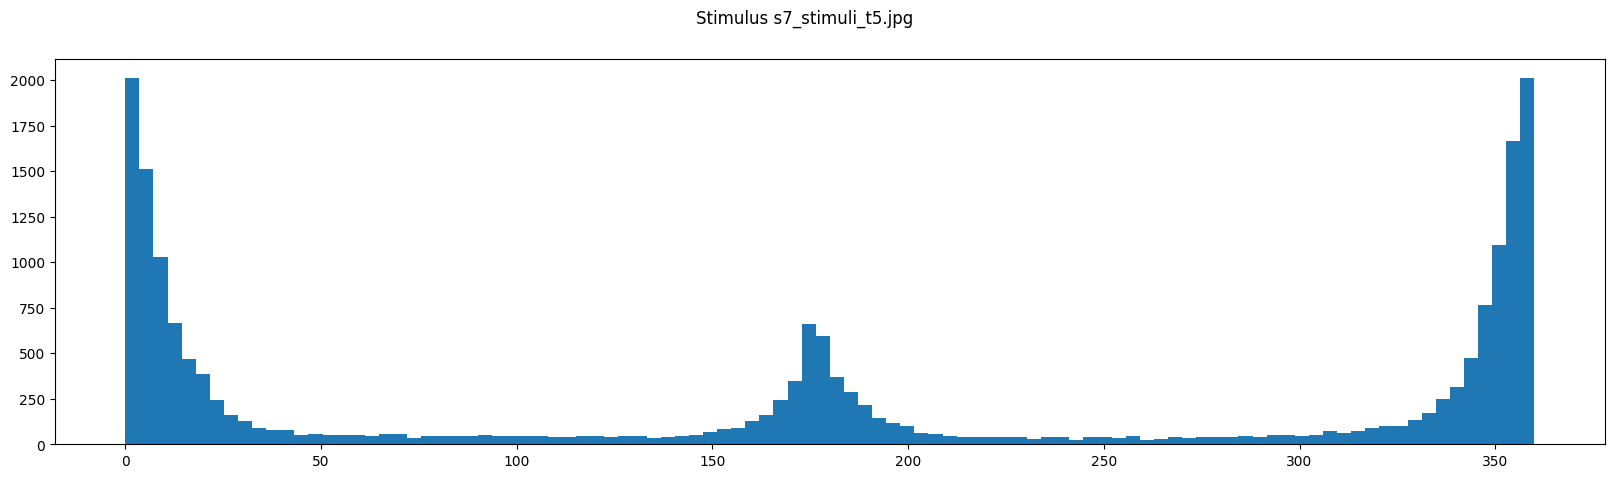

In [ ]:
for i,stim in enumerate(DyslexiaDat.stimuli):
    stim_saccades = Saccades[:,i,:,:]

    stim_saccades = np.array(stim_saccades)
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))
    fig.suptitle(f'Stimulus {stim}')

    angles = []
    for subj in stim_saccades:
        for h in range(subj.shape[0]):
            for v in range(subj.shape[1]):
                for val in subj[h,v]:
                    angles.append(val)
    ax.hist(angles, bins=100)

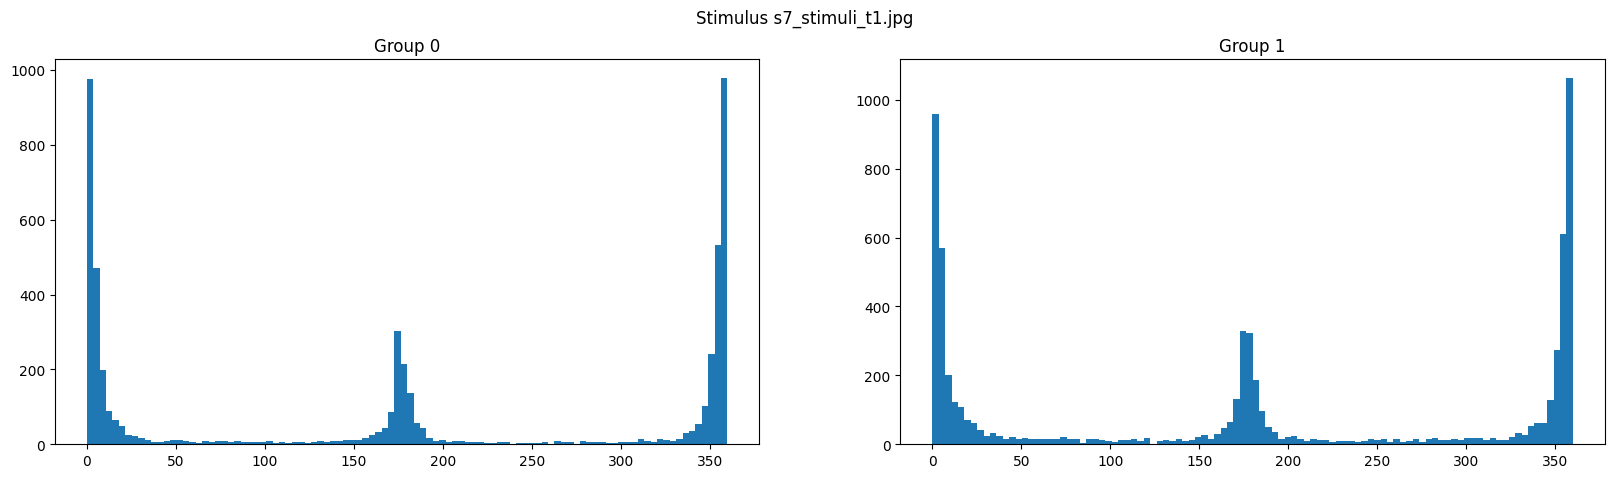

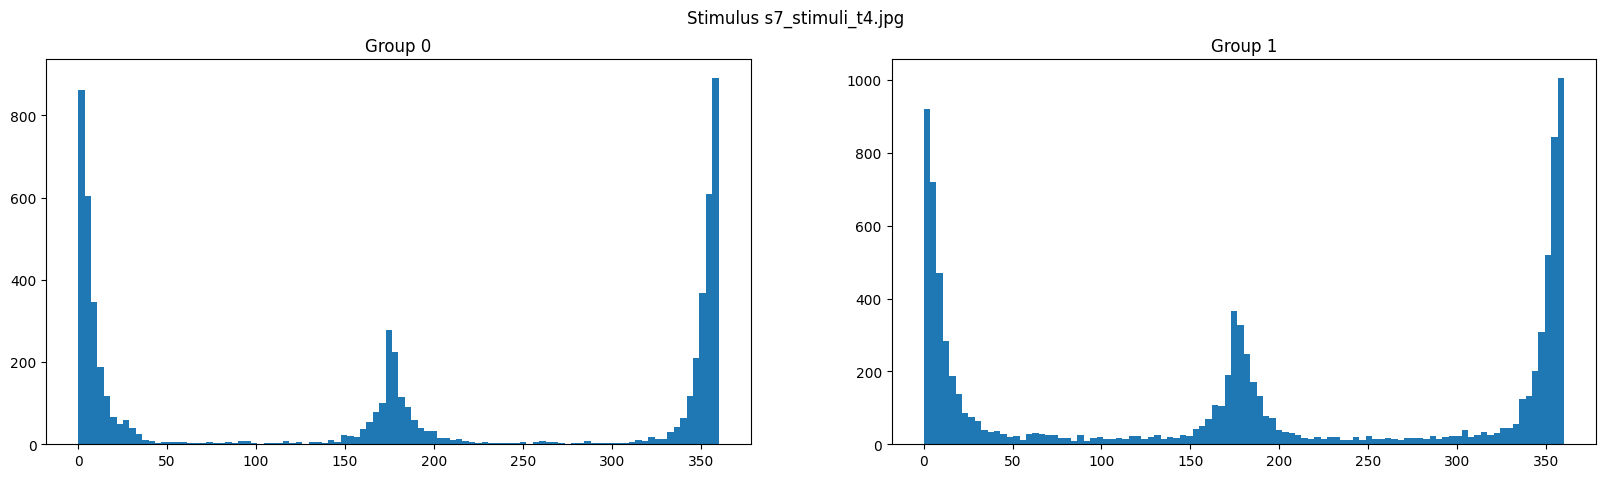

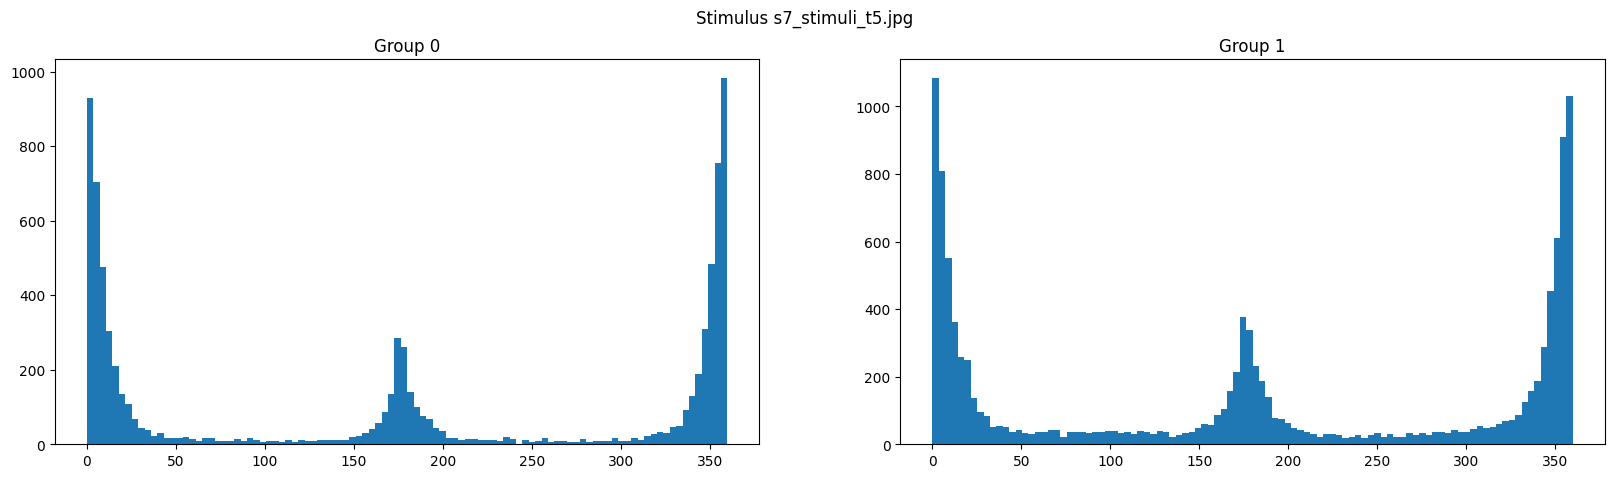

In [ ]:
for i,stim in enumerate(DyslexiaDat.stimuli):
    # for every group of subjects show an istogram with the distribution of the saccades angles
    groups = np.unique(Cond)
    group_saccades = []
    for group in groups:
        # from Saccades[subject, :,:] get only the subjects that are in the group
        group_saccades.append(Saccades[Cond==group,i,:,:])

    group_saccades = np.array(group_saccades)
    fig, ax = plt.subplots(1, len(groups), figsize=(20, 5))
    fig.suptitle(f'Stimulus {stim}')

    for j, group in enumerate(group_saccades):
        angles = []
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h,v]:
                        angles.append(val)
        ax[j].hist(angles, bins=100)
        ax[j].set_title(f'Group {j}')

In [282]:
def split_subjects(matrix, group_list):
    # get unique groups
    groups = np.unique(group_list)
    # create the new matrix
    M = []
    list_subj = []
    for group in groups:
        idx = np.where(group_list == group)[0]
        M.append(matrix[idx][:, idx])
        list_subj.append(idx)
    return M, list_subj

In [283]:
def matrix_subject_reorder(matrix, list_subj):
    M = np.zeros_like(matrix)
    for i, idx1 in enumerate(list_subj):
        for j, idx2 in enumerate(list_subj):
            M[i, j] = matrix[idx1, idx2]
    return M

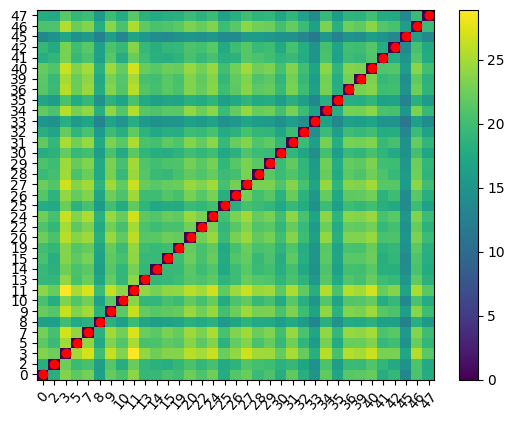

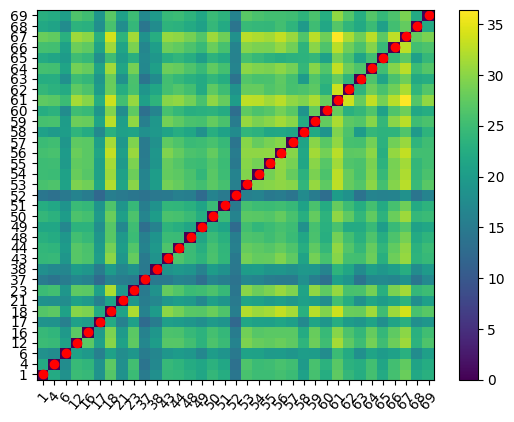

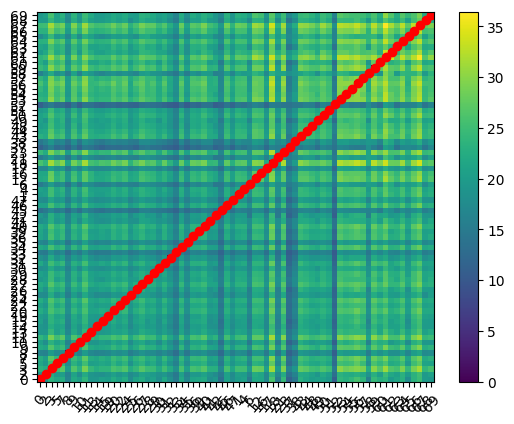

In [284]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False)
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

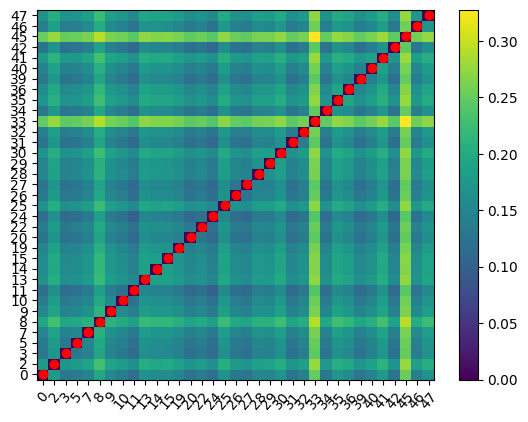

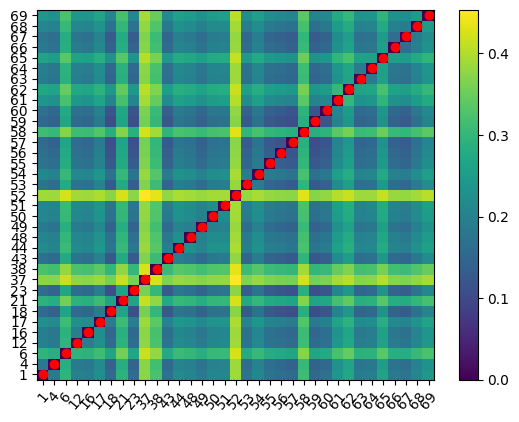

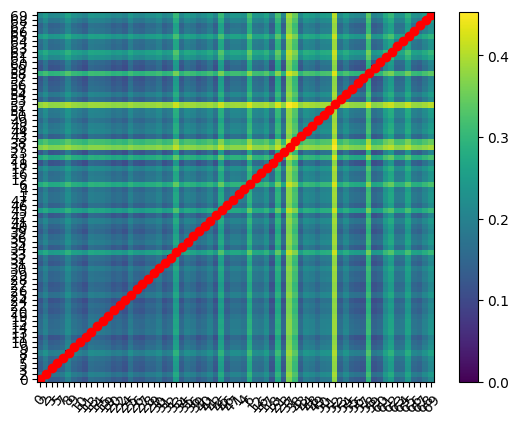

In [ ]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False,method='power')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

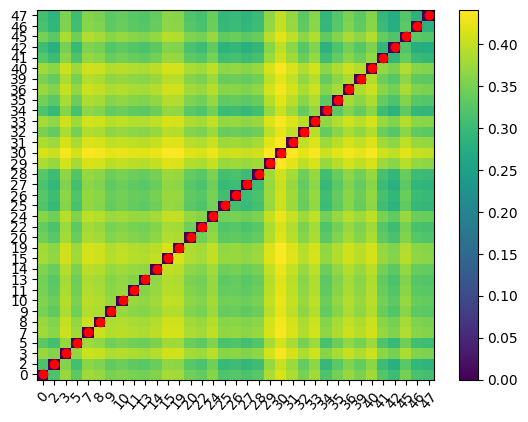

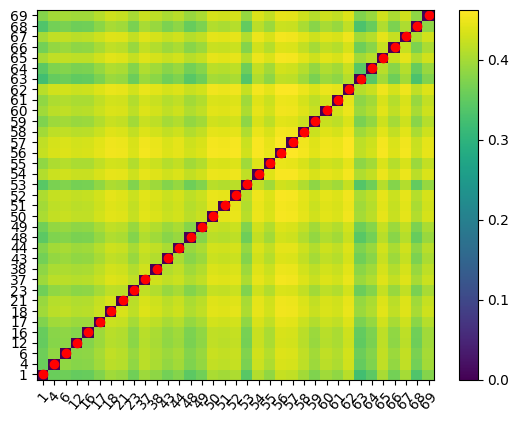

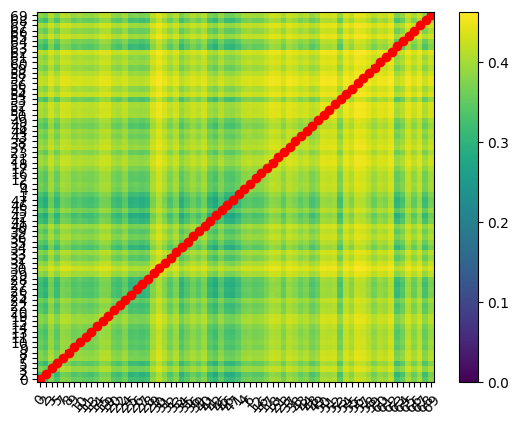

In [ ]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False,method='peak180')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

---

0 1
calculating all to all similarity with div 1*1 took 9.839 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:343: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:344: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


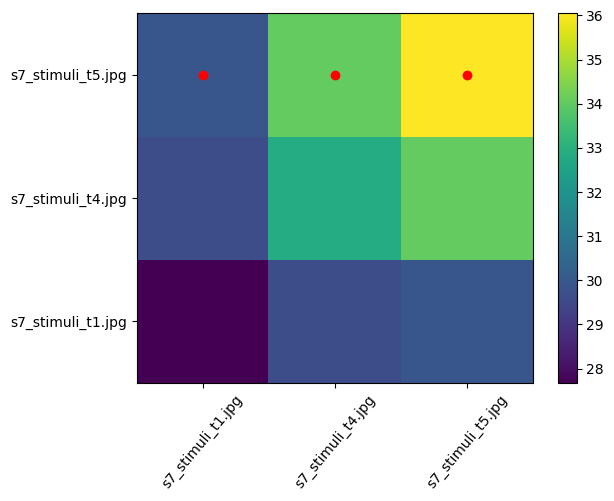

In [ ]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[1], Thr=10, InferS=False, normalize='add')
DyslexiaDat.VisSimmat(S0[0])

0 1
calculating all to all similarity with div 1*1 took 10.358 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:343: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:344: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


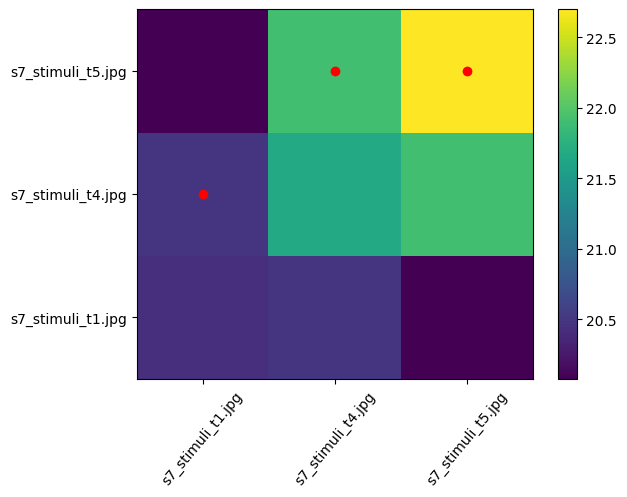

In [ ]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[1], InferS=False, method='power')
DyslexiaDat.VisSimmat(S0[0])

0 1
calculating all to all similarity with div 1*1 took 11.013 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:343: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:344: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


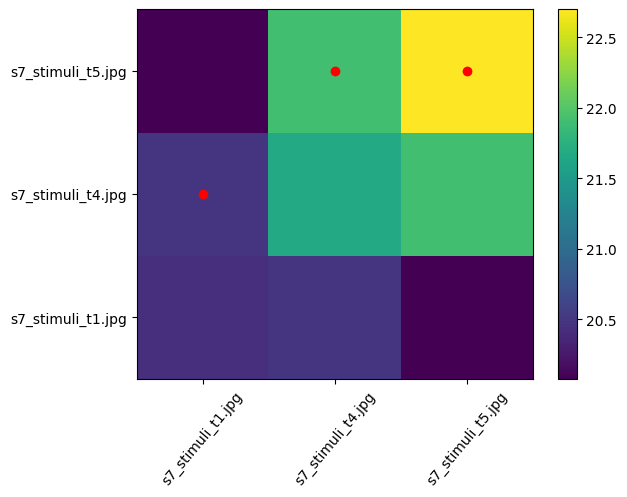

In [ ]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[1], InferS=False, method='peak180')
DyslexiaDat.VisSimmat(S0[0])

0 1
calculating all to all similarity with div 1*1 took 10.824 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:345: RuntimeWarning: Mean of empty slice
  SimsAll.append(SimSacP)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:346: RuntimeWarning: Mean of empty slice
  end_time=time.time()


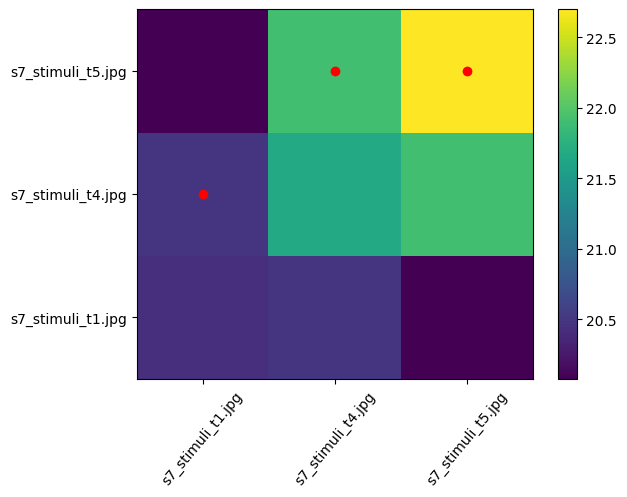

In [ ]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[1], InferS=False, method='peak180', match=True)
DyslexiaDat.VisSimmat(S0[0])

0 1
calculating all to all similarity with div 1*1 took 10.835 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:345: RuntimeWarning: Mean of empty slice
  SimsAll.append(SimSacP)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:346: RuntimeWarning: Mean of empty slice
  end_time=time.time()


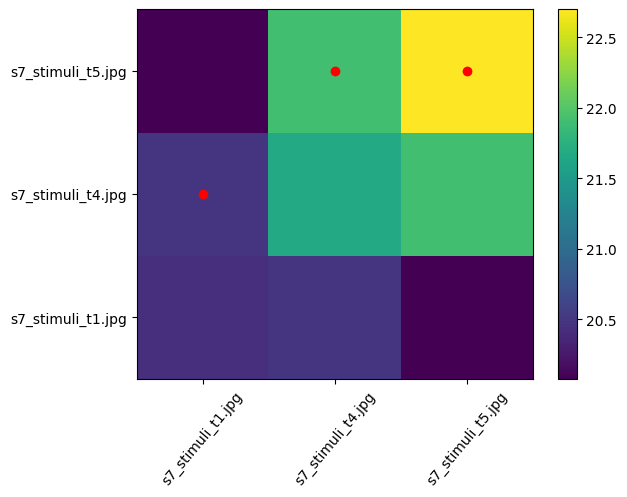

In [105]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[1], InferS=False, method='Kuiper')
DyslexiaDat.VisSimmat(S0[0])

0 9
calculating all to all similarity with div 9*9 took 59.721 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:343: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:344: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


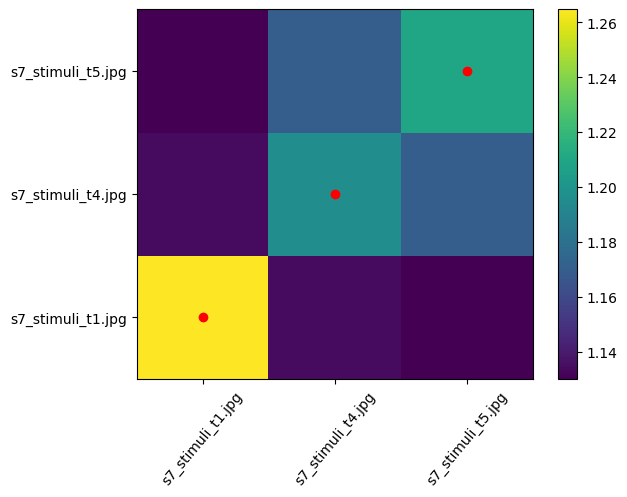

In [ ]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[9], Thr=10, InferS=False, normalize='add')
DyslexiaDat.VisSimmat(S0[0])

0 9
calculating all to all similarity with div 9*9 took 60.109 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:343: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:344: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


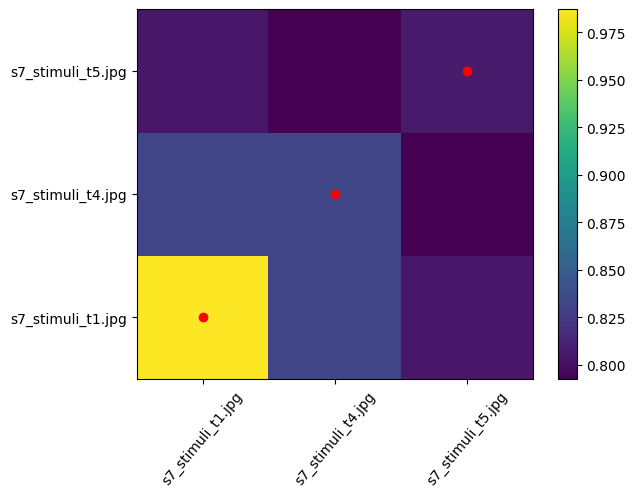

In [ ]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[9], InferS=False, method='power')
DyslexiaDat.VisSimmat(S0[0])

0 9
calculating all to all similarity with div 9*9 took 60.602 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:343: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:344: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


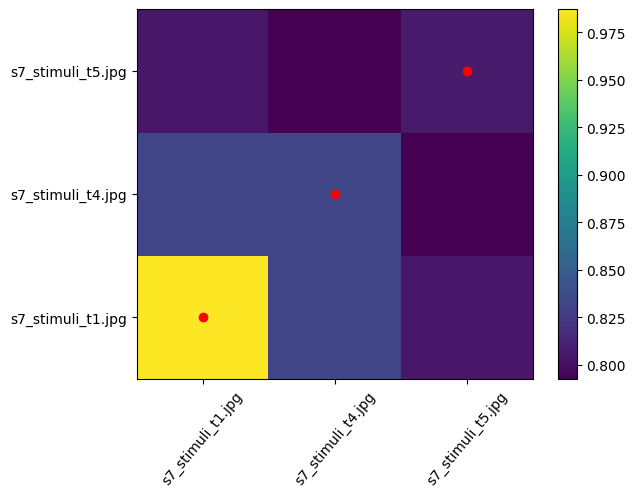

In [ ]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[9], InferS=False, method='peak180')
DyslexiaDat.VisSimmat(S0[0])

0 9
calculating all to all similarity with div 9*9 took 60.698 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:345: RuntimeWarning: Mean of empty slice
  SimsAll.append(SimSacP)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:346: RuntimeWarning: Mean of empty slice
  end_time=time.time()


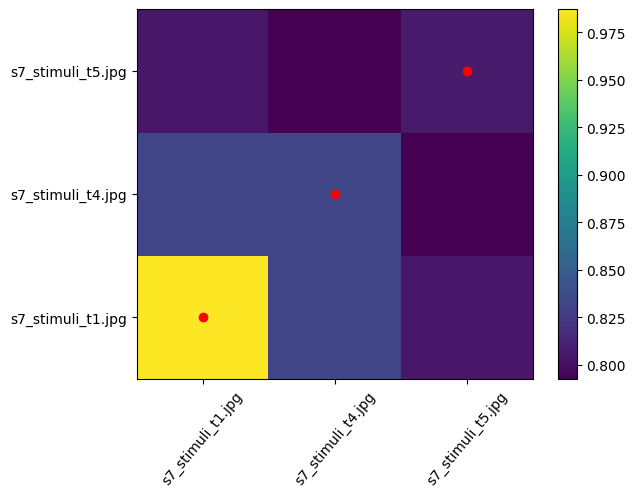

In [108]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[9], InferS=False, method='peak180', match=True)
DyslexiaDat.VisSimmat(S0[0])

0 9
calculating all to all similarity with div 9*9 took 60.370 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:345: RuntimeWarning: Mean of empty slice
  SimsAll.append(SimSacP)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:346: RuntimeWarning: Mean of empty slice
  end_time=time.time()


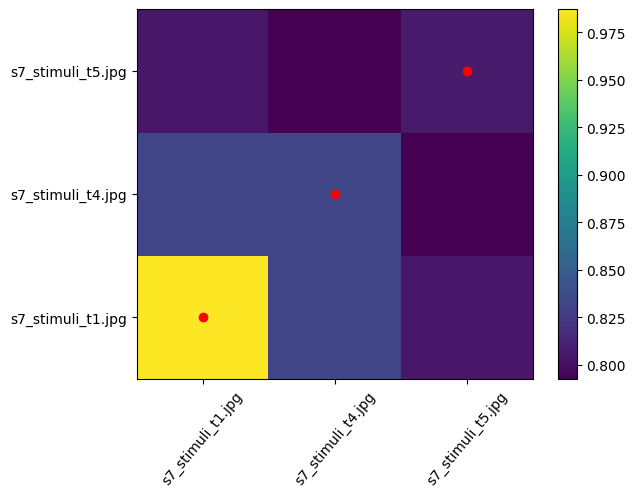

In [104]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[9], InferS=False, method='Kuiper')
DyslexiaDat.VisSimmat(S0[0])

---

Conditions [0 1]


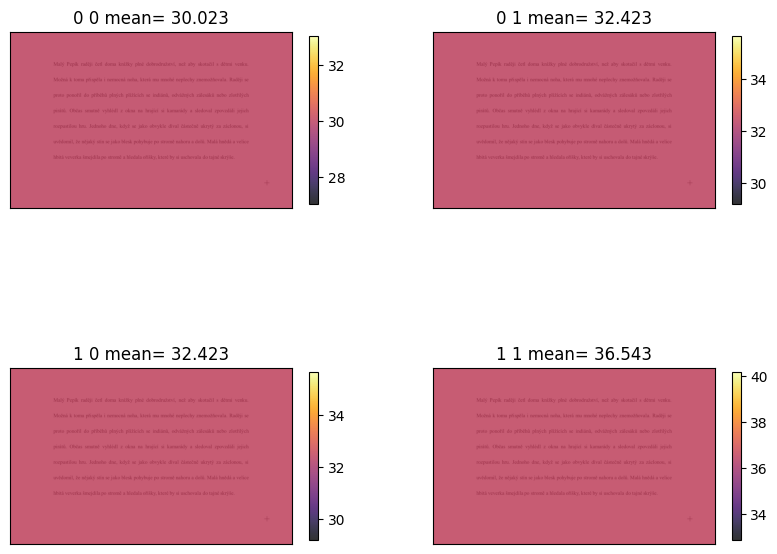

In [ ]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, Thr=10, inferS=False)

Conditions [0 1]


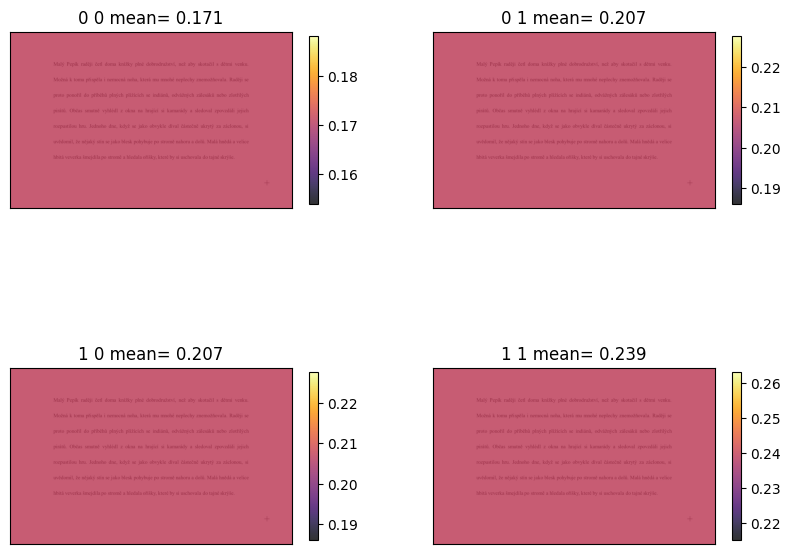

In [ ]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='power')

Conditions [0 1]


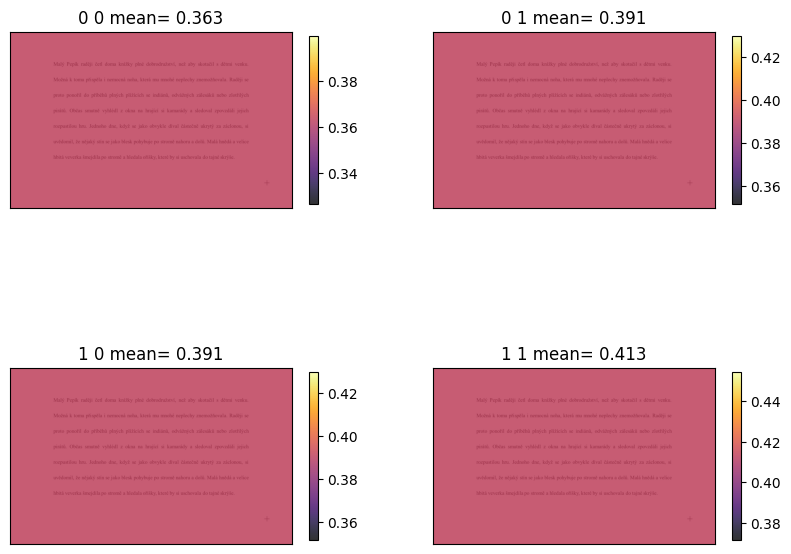

In [ ]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='peak180')

Conditions [0 1]


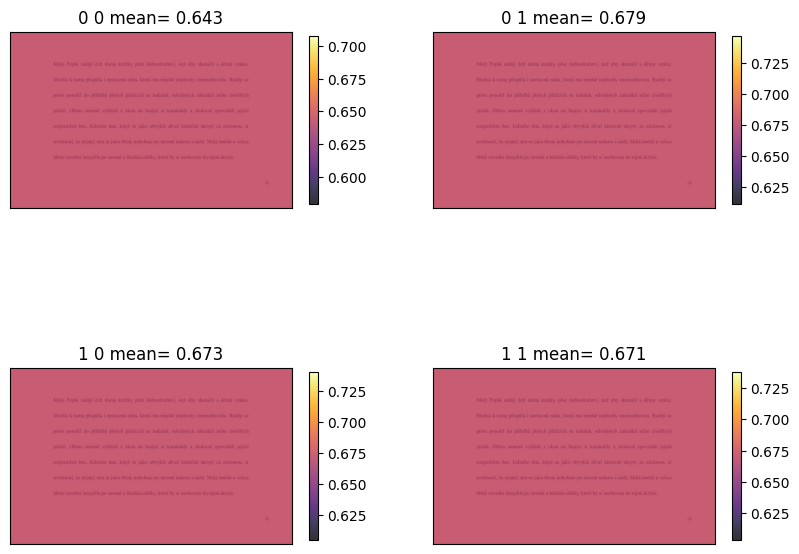

In [109]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='peak180', match=True)

Conditions [0 1]


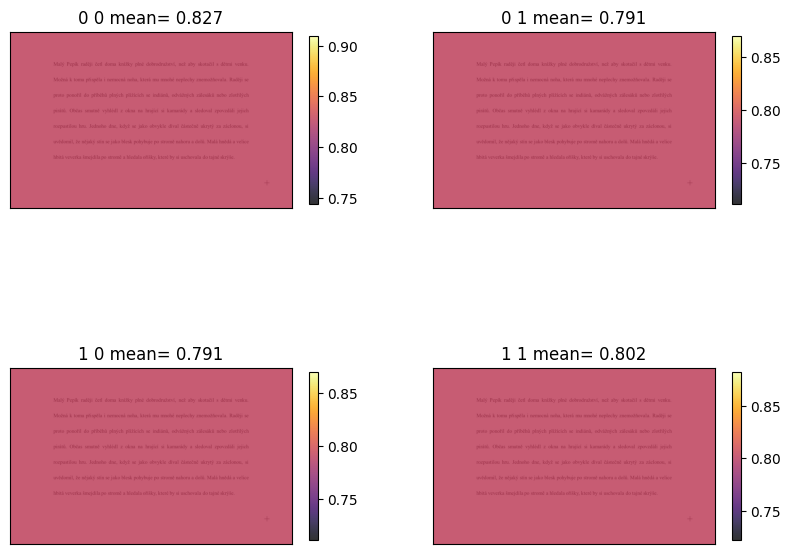

In [110]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='Kuiper')

Conditions [0 1]


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:384: RuntimeWarning: Mean of empty slice
  ax[cgr1,cgr2].set_title(str(gr1)+' '+str(gr2)+' mean= '+str(np.round(SimVals[cgr1,cgr2],3)))


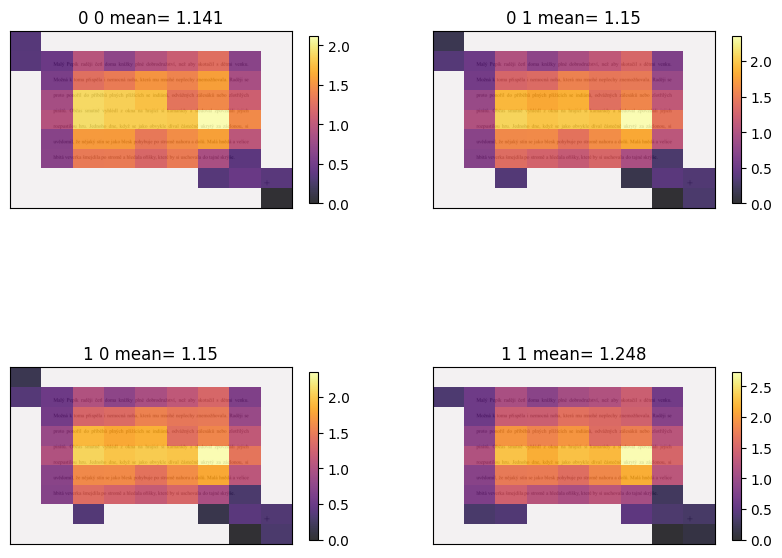

In [113]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, normalize='add', Thr=10)

Conditions [0 1]


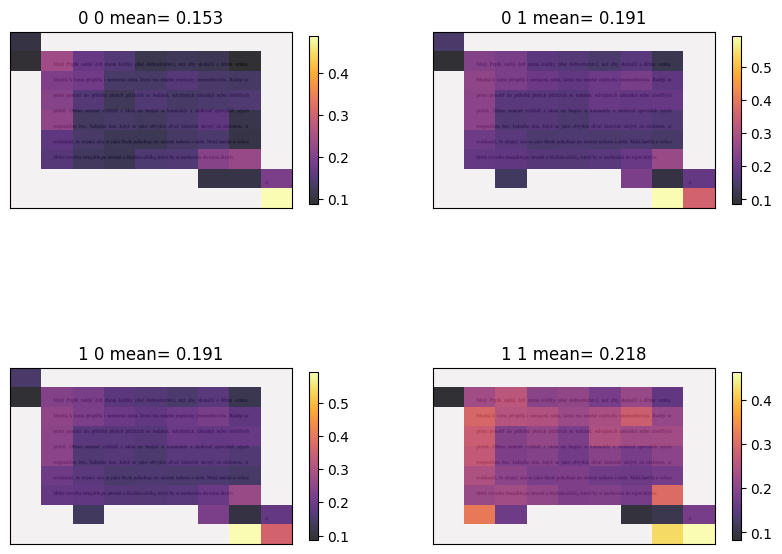

In [114]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, method='power')

Conditions [0 1]


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:384: RuntimeWarning: Mean of empty slice
  ax[cgr1,cgr2].set_title(str(gr1)+' '+str(gr2)+' mean= '+str(np.round(SimVals[cgr1,cgr2],3)))


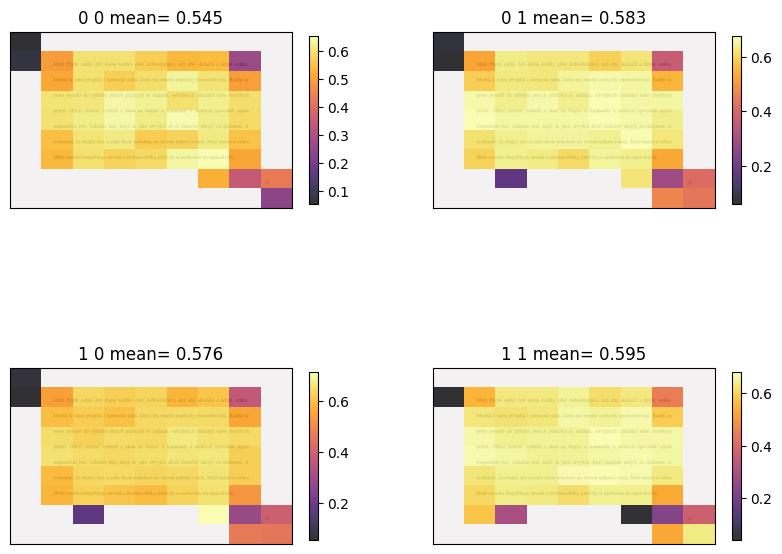

In [111]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, method='peak180', match=True)

Conditions [0 1]


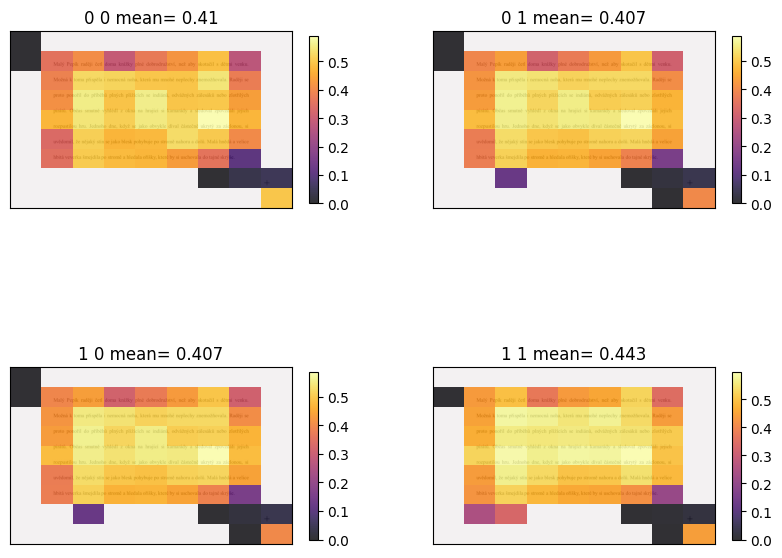

In [112]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, method='Kuiper')

---

## Classification

---

Since we have a pipline that calculates for every subject the similarity with one specifci group, by checking the mean of the group, we can use this metric to classify the subjects in the groups.

So for every subject we will have two values, one for each group, and we will check which one has the highest similarity value.

for example (lower value = more similar)
Subject 0: Group 0: 0.2, Group 1: 0.5 -> Subject 0 is more similar to Group 0 if the true label is 0 we have a correct classification

In [ ]:
_,WhichCN=DyslexiaDat.GetGroups('class_id')
WhichCN

Conditions [0 1]


array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

In [369]:
def sim_classification(SimVals,list_subj,betwcond, summary=False, verbose=False, check='min'):
    _,WhichCN=DyslexiaDat.GetGroups(betwcond)
    correct = 0
    false_positives = 0
    false_negatives = 0
    for subj_idx, subj in enumerate(list_subj):
        if not summary and verbose:
            print(f'Subject {subj} is in group {WhichCN[subj]}')
        means = []
        for group in np.unique(WhichCN):
            means.append(np.mean(SimVals[subj_idx][group]))

        flag = False
        if check == 'min':
            if np.argmin(means) == WhichCN[subj]:
                flag = True
        elif check == 'max':
            if np.argmax(means) == WhichCN[subj]:
                flag = True

        if flag:
            correct += 1
            if not summary and verbose:
                print('Correctly classified')
        else:
            if not summary and verbose:
                print(f'Incorrectly classified as group {np.argmin(means)}')
            if np.argmin(means) == 0:
                false_negatives += 1
            else:
                false_positives += 1
        if not summary and verbose:
            print('')
    if summary and verbose:
        # print percentage of correct classifications
        print(f'Correctly classified: {correct/len(list_subj)*100}%')
        print(f'False negatives: {false_negatives/len(list_subj)*100}%')
        print(f'False positives: {false_positives/len(list_subj)*100}%')
    accuracy = correct/len(list_subj)*100
    if not verbose:
        return accuracy

In [363]:
# select n random subjects
n = 5
subj = np.random.choice(DyslexiaDat.ns, n)
subj

array([33,  2, 48, 54, 32])

In [64]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, Thr=10, normalize='add')

Conditions [0 1]


In [ ]:
sim_classification(SimVals,list(subj),'class_id')

Conditions [0 1]


40.0

In [75]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='power')

Conditions [0 1]


In [76]:
sim_classification(SimVals,list(subj),'class_id')

Conditions [0 1]
Subject 44 is in group 1
Incorrectly classified as group 0

Subject 35 is in group 0
Correctly classified

Subject 65 is in group 1
Incorrectly classified as group 0

Subject 50 is in group 1
Incorrectly classified as group 0

Subject 29 is in group 0
Correctly classified



In [77]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180')

Conditions [0 1]


In [78]:
sim_classification(SimVals,list(subj),'class_id')

Conditions [0 1]
Subject 44 is in group 1
Correctly classified

Subject 35 is in group 0
Correctly classified

Subject 65 is in group 1
Correctly classified

Subject 50 is in group 1
Incorrectly classified as group 0

Subject 29 is in group 0
Correctly classified



In [558]:
subj = range(DyslexiaDat.ns)

In [146]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, Thr=10, normalize='add')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True, check='max')

Conditions [0 1]
Conditions [0 1]
Correctly classified: 50.0%
False negatives: 50.0%
False positives: 0.0%


In [124]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='power')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 50.0%
False negatives: 0.0%
False positives: 50.0%


In [126]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 50.0%
False negatives: 0.0%
False positives: 50.0%


In [373]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='peak180')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 50.0%
False negatives: 50.0%
False positives: 0.0%


In [ ]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='peak180', match=True)
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 72.85714285714285%
False negatives: 27.142857142857142%
False positives: 0.0%


In [ ]:
sim_classification(SimVals,list(subj),'class_id', summary=False, verbose=True)

Conditions [0 1]
Subject 0 is in group 0
Correctly classified

Subject 1 is in group 1
Incorrectly classified as group 0

Subject 2 is in group 0
Correctly classified

Subject 3 is in group 0
Correctly classified

Subject 4 is in group 1
Incorrectly classified as group 0

Subject 5 is in group 0
Correctly classified

Subject 6 is in group 1
Correctly classified

Subject 7 is in group 0
Correctly classified

Subject 8 is in group 0
Correctly classified

Subject 9 is in group 0
Correctly classified

Subject 10 is in group 0
Correctly classified

Subject 11 is in group 0
Correctly classified

Subject 12 is in group 1
Correctly classified

Subject 13 is in group 0
Correctly classified

Subject 14 is in group 0
Correctly classified

Subject 15 is in group 0
Correctly classified

Subject 16 is in group 1
Incorrectly classified as group 0

Subject 17 is in group 1
Incorrectly classified as group 0

Subject 18 is in group 1
Incorrectly classified as group 0

Subject 19 is in group 0
Correctly 

In [ ]:
print(np.mean(SimVals[4][0]))
print(np.mean(SimVals[4][1]))

0.640834071633607
0.6681254283612055


In [130]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180', match=True)
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 62.857142857142854%
False negatives: 0.0%
False positives: 37.142857142857146%


In [374]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='Kuiper')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True, check='max')

Conditions [0 1]
Conditions [0 1]
Correctly classified: 64.28571428571429%
False negatives: 8.571428571428571%
False positives: 27.142857142857142%


In [ ]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='Kuiper')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True, check='max')

Conditions [0 1]
Conditions [0 1]
Correctly classified: 51.42857142857142%
False negatives: 48.57142857142857%
False positives: 0.0%


---

One problem related to the previous method for the classification is that dyslexic subject can result higly different not only from the helthy control but also from each other.

Lets assume that if a subject is very dissimilar from both the groups than is a dyslexic subject.

If this is the case and the original label is 1 (Dyslexic) then we can say that the algorithm is able to correctly classify the subject.

In [580]:
def sim_classification_thr(SimVals,list_subj,WhichCN, thr=0.75, summary=False, verbose=False, check='min'):
    correct = 0
    false_positives = 0
    false_negatives = 0
    for subj_idx, subj in enumerate(list_subj):
        if not summary and verbose:
            print(f'Subject {subj} is in group {WhichCN[subj]}')
        means = []
        for group in np.unique(WhichCN):
            means.append(np.mean(SimVals[subj_idx][group]))

        flag = False
        if check == 'min':
            if np.argmin(means) == WhichCN[subj] or (np.min(means) > thr and WhichCN[subj] == 1): # pass a high thr to classify dyslexic subject that have a high dissimilarity with both group
                flag = True
        elif check == 'max':
            if np.argmax(means) == WhichCN[subj] or (np.max(means) < thr and WhichCN[subj] == 1):
                flag = True

        if flag:
            correct += 1
            if not summary and verbose:
                print('Correctly classified')
        else:
            if not summary and verbose:
                print(f'Incorrectly classified as group {np.argmin(means)}')
            if np.argmin(means) == 0:
                false_negatives += 1
            else:
                false_positives += 1
        if not summary and verbose:
            print('')
    if summary and verbose:
        # print percentage of correct classifications
        print(f'Correctly classified: {correct/len(list_subj)*100}%')
        print(f'False negatives: {false_negatives/len(list_subj)*100}%')
        print(f'False positives: {false_positives/len(list_subj)*100}%')
    accuracy = correct/len(list_subj)*100
    if not verbose:
        return accuracy

In [560]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='peak180')

Conditions [0 1]


In [569]:
sim_classification_thr(SimVals,list(subj), WhichCN, thr=0.6, summary=True, verbose=True)

Conditions [0 1]
Correctly classified: 50.0%
False negatives: 50.0%
False positives: 0.0%


In [501]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='peak180', match=True)

Conditions [0 1]


In [ ]:
sim_classification_thr(SimVals,list(subj),WhichCN, thr=0.61, summary=True, verbose=True)

Conditions [0 1]
Correctly classified: 100.0%
False negatives: 0.0%
False positives: 0.0%


In [478]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='Kuiper')

Conditions [0 1]


In [ ]:
sim_classification_thr(SimVals,list(subj),WhichCN, thr=0.9, summary=True, verbose=True, check='max')

Conditions [0 1]
Correctly classified: 91.42857142857143%
False negatives: 8.571428571428571%
False positives: 0.0%


---

Lets try with 100 trials

In [515]:
Cond

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

In [581]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=1, nVer=1, InferS=False)

In [582]:
accuracy = []
for i in range(0, 100):
    tot_subj = DyslexiaDat.ns
    n = int(tot_subj*0.1)
    np.random.seed(i)
    subj = np.random.choice(DyslexiaDat.ns, n, replace=False)
    SimVals=DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(subj),  method='peak180', match=True)
    accuracy.append(sim_classification_thr(SimVals,list(subj),WhichCN, thr=0.6, summary=True, verbose=False))

accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')

Average accuracy: 99.28571428571428
Standard deviation: 3.113499245386196


In [585]:
accuracy = []
for i in range(0, 100):
    tot_subj = DyslexiaDat.ns
    n = int(tot_subj*0.1)
    np.random.seed(i)
    subj = np.random.choice(DyslexiaDat.ns, n, replace=False)
    SimVals=DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(subj),  method='Kuiper')
    accuracy.append(sim_classification_thr(SimVals,list(subj),WhichCN, thr=0.9, summary=True, verbose=False, check='max'))

accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')

Average accuracy: 91.0
Standard deviation: 10.814766926451508


---

## Classification with machine learning

In [545]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to aggregate features (mean, std, min, max for each subject)
def aggregate_subject_features(data, subject_ids):
    aggregated_data = []
    aggregated_labels = []
    for subj in subject_ids:
        subj_data = data[data['sid'] == subj][['orig_fix_x', 'orig_fix_y', 'duration_ms']].values
        features = np.hstack([
            np.mean(subj_data, axis=0),
            np.std(subj_data, axis=0),
            np.min(subj_data, axis=0),
            np.max(subj_data, axis=0)
        ])
        aggregated_data.append(features)
        aggregated_labels.append(data[data['sid'] == subj]['class_id'].iloc[0])  # Assumes all fixations for a subject have the same label
    return np.array(aggregated_data), np.array(aggregated_labels)

# Split data by subject
subj = FixData['sid'].unique()

accuracy = []
for i in range(100):
    train_participants, test_participants = train_test_split(subj, test_size=0.1, random_state=i)

    # Select data for a specific stimulus
    Data=FixData[FixData['stimfile']== 's7_stimuli_t4.jpg']

    train_data = Data[Data['sid'].isin(train_participants)]
    test_data = Data[Data['sid'].isin(test_participants)]

    # Aggregate training and test data
    X_train, y_train = aggregate_subject_features(train_data, train_participants)
    X_test, y_test = aggregate_subject_features(test_data, test_participants)

    # Train Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=5)
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    

print(f'Mean accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')

Mean accuracy: 0.7857142857142857
Standard deviation: 0.14356965173029845


---

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [21]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft

def get_data(stim, split_size, batch_size, random_state):
    # Splitting by participants
    subj = FixData['sid'].unique()
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    Data=FixData[FixData['stimfile']== stim]
    train_data = Data[Data['sid'].isin(train_participants)]
    test_data = Data[Data['sid'].isin(test_participants)]

    # calculate the subject with the most fixations
    max_fixations = Data['sid'].value_counts().max()
    #print(f'Subject {Data["sid"].value_counts().idxmax()} has the most fixations ({max_fixations})')

    # Feature selection for each participant
    def extract_features(data):
        features = []
        labels = []
        for subj in data['sid'].unique():
            subj_data = data[data['sid'] == subj][['orig_fix_x', 'orig_fix_y']].values
            features.append(subj_data)
            labels.append(data[data['sid'] == subj]['class_id'].iloc[0])
        return features, labels

    train_features, train_labels = extract_features(train_data)
    test_features, test_labels = extract_features(test_data)

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(pad_size):
                cn = np.sqrt(2 / pad_size) if k != 0 else np.sqrt(1 / pad_size)
                dct_result[k, n] = cn * np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * pad_size)))
        return dct_result
        
    # Step 3: Perform IDCT Type III
    def perform_idct(data):
        idct_result = np.zeros((data.shape[0], data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(data.shape[0]):
                idct_result[k, n] = np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * data.shape[0])) * (np.sqrt(2 / data.shape[0]) if k != 0 else np.sqrt(1 / data.shape[0])))
        return idct_result

    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio

    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0)

    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[:magnitude.shape[0]//2]
        return final_data

    pad = max([len(data) for data in train_features + test_features])
    # Apply the pipeline to all participants
    train_features = [data_output(data, pad) for data in train_features]
    test_features = [data_output(data, pad) for data in test_features]

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    test_labels = torch.tensor(test_labels, dtype=torch.float32)

    # Create DataLoader
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader, train_features, train_labels, test_features, test_labels

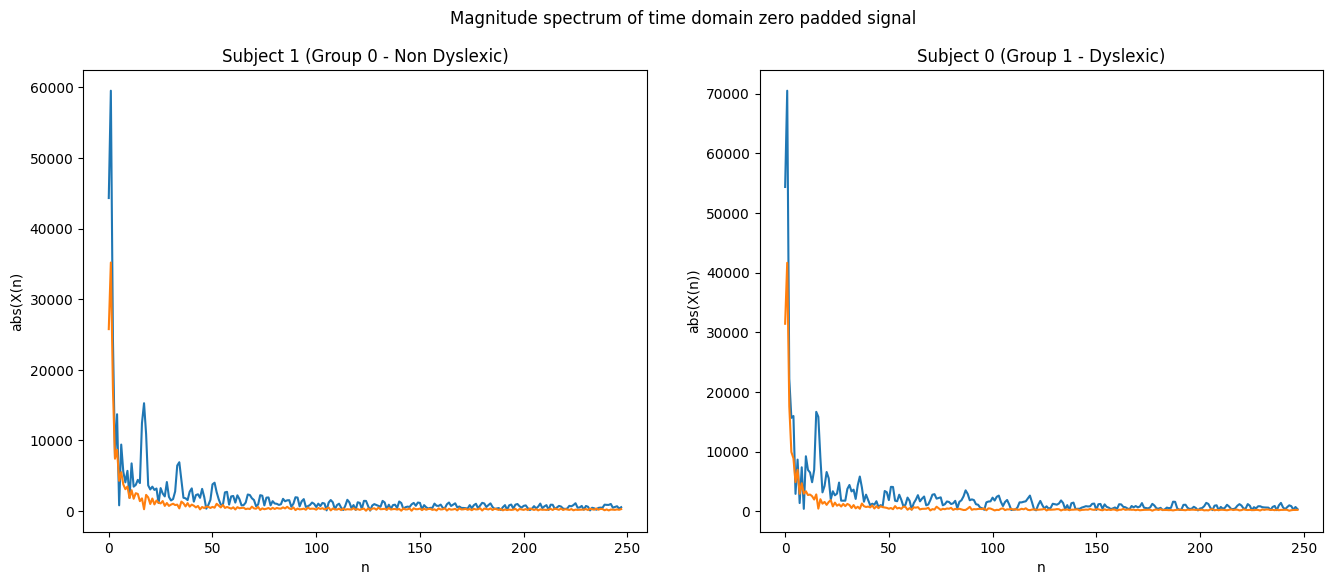

In [ ]:
"""
# 2 plot of the Magnitude spectrum of time domain interpolated signal for group 0 and group 1
plt.figure(figsize=(16, 6))
plt.suptitle('Magnitude spectrum of time domain zero padded signal')
plt.subplot(1, 2, 1)
plt.plot(train_features[1])
plt.title('Subject 1 (Group 0 - Non Dyslexic)')
plt.xlabel('n')
plt.ylabel('abs(X(n)')
plt.subplot(1, 2, 2)
plt.plot(train_features[0])
plt.title('Subject 0 (Group 1 - Dyslexic)')
plt.xlabel('n')
plt.ylabel('abs(X(n))')
plt.show()
"""

In [17]:
class FixationCNN(nn.Module):
    def __init__(self):
        super(FixationCNN, self).__init__()
        self.conv1 = nn.Conv1d(2, 8, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(8)
        self.conv2 = nn.Conv1d(8, 16, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(16)
        self.conv3 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(2, 2)
        self.fc1 = None  # Placeholder, defined after calculating the size dynamically
        self.fc2 = nn.Linear(32, 1)  # Binary classification

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        
        # Flatten dynamically
        x = torch.flatten(x, start_dim=1)  
        
        # Define fc1 dynamically on the first pass
        self.fc1 = nn.Linear(x.shape[1], 32)
        
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [22]:
# Verbose
verbose = False

for i in range(100):
    # Model, Loss, and Optimizer
    # In the training Stochastic Gradient Descent algorithm (initial learning speed of 0.01) with a momentum was used to minimize a crossentrophy loss function
    # Split data into training and validation sets

    train_loader, test_loader, train_features, train_labels, test_features, test_labels = get_data('s7_stimuli_t4.jpg', split_size=0.1, batch_size=16, random_state=i)

    train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.1, random_state=42)

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32)
    val_features = torch.tensor(val_features, dtype=torch.float32)
    val_labels = torch.tensor(val_labels, dtype=torch.float32)

    # Create DataLoader
    train_dataset = TensorDataset(train_features, train_labels)
    val_dataset = TensorDataset(val_features, val_labels)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    model = FixationCNN()
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    # Training Loop
    num_epochs = 1000
    losses = []
    accuracy = []
    # Early stopping parameters
    early_stop_patience = 100
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.permute(0, 2, 1)
            labels = labels.unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        l = running_loss / len(train_loader)
        losses.append(l)

        # Validation
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            model.eval()
            for inputs, labels in val_loader:
                inputs = inputs.permute(0, 2, 1)
                labels = labels.unsqueeze(1)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                predicted = (outputs >= 0.5).float()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_loss /= len(val_loader)
        accuracy.append(100 * correct / total)
        if verbose:
            print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {l:.4f} - Val Loss: {val_loss:.4f} - Val Acc: {100 * correct / total:.2f}%")
        
        # Early stopping check
        if l < best_loss:
            best_loss = l
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stop_patience:
                if verbose:
                    print("Early stopping triggered")
                break

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    accuracy = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.permute(0, 2, 1)
            labels = labels.unsqueeze(1)
            outputs = model(inputs)
            predicted = (outputs >= 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy.append(100 * correct / total)

print(f"Mean accuracy: {np.mean(accuracy)}%")

C:\Users\nickp\AppData\Local\Temp\ipykernel_24024\1417453694.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_features = torch.tensor(train_features, dtype=torch.float32)
C:\Users\nickp\AppData\Local\Temp\ipykernel_24024\1417453694.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.float32)
C:\Users\nickp\AppData\Local\Temp\ipykernel_24024\1417453694.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_features = torch.tensor(val_features, dtype=torch.float32)
C:\Users\

Mean accuracy: 71.42857142857143%


---

In [26]:
def get_subj(split_size, random_state):
    subj = FixData['sid'].unique() 
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    list_subj = []
    for idx,s in enumerate(subj):
        if s in test_participants:
            list_subj.append(idx)
    
    return list_subj

In [27]:
stimn = 1
accuracy = []
for i in range(100):
    list_subj = get_subj(split_size=0.1, random_state=i)
    SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=stimn, betwcond='class_id', subjects=list_subj, nHor=9, inferS=False, method='peak180')
    accuracy.append(sim_classification(SimVals,list_subj,'class_id', summary=True, verbose=False))

print(f"Mean accuracy: {np.mean(accuracy)}%")

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 

In [774]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list_subj, nHor=9, inferS=False, method='power')
sim_classification(SimVals,list_subj,'class_id', summary=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 42.857142857142854%
False negatives: 0.0%
False positives: 57.14285714285714%


In [775]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list_subj, nHor=9, inferS=False, Thr=10, normalize='add')
sim_classification(SimVals,list_subj,'class_id', summary=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 14.285714285714285%
False negatives: 42.857142857142854%
False positives: 42.857142857142854%


In [776]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list_subj, nHor=9, inferS=False, method='peak180')

Conditions [0 1]


In [779]:
sim_classification_closestmean(SimVals,list_subj,'class_id', summary=True, mean_g0=0.4, mean_g1=0.5)

Conditions [0 1]
Correctly classified: 71.42857142857143%
False negatives: 28.57142857142857%
False positives: 0.0%
